## Using Python (and R) for Finance -- (Sanjiv Das)

In this notebook we will get started with using Python for financial computation. You first need to download and install IPython which is an entire system for interactive use of Python. Luckily, this is easily done by visiting the following URL and downloading the version applicable to your machine (Python runs on all platforms). 

Visit Continuum Analytics and download Python: http://continuum.io/downloads and install it. Test that it works by using the Launcher (which will be on your desktop) to start up the IPython Notebook. 

Also install the R programming language, which is a very useful tool for Machine Learning. 
See: http://en.wikipedia.org/wiki/Machine_learning
Get R from: http://www.r-project.org/ (download and install it). 

In order to allow Python to interface with R, you also need to install the "rpy2" package from: http://rpy.sourceforge.net/
While you do not need to use R, and can get by mostly with Python, it is also a useful language as there are heaps of finance packages in R. As you will see, we can run both within the IPython Notebook. (Indeed, these lecture notes have been prepared in the Notebook.)

If you want to use R in IDE mode, download RStudio: http://www.rstudio.com/

Particularly useful are linear algebra capabilities in Python and R. In Python the package numPy makes these facile. Also useful are graphical libraries, and in Python, these comes in the matplotlib package. 

In [1]:
#Invoke numPy and matplotlib in one command
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#IMPORTING STOCK DATA USING PANDAS
from pandas.io.data import DataReader
from datetime import datetime
goog = DataReader("GOOG",  "yahoo", datetime(2014,4,1), datetime(2015,3,31))
stkp = goog["Adj Close"]
print stkp

Date
2014-04-01    567.15997
2014-04-02    567.00000
2014-04-03    569.73999
2014-04-04    543.14001
2014-04-07    538.15002
2014-04-08    554.90002
2014-04-09    564.14001
2014-04-10    540.95001
2014-04-11    530.59998
2014-04-14    532.52002
2014-04-15    536.44000
2014-04-16    556.53998
2014-04-17    536.09998
2014-04-21    528.62000
2014-04-22    534.81000
...
2015-03-11    551.17999
2015-03-12    555.51001
2015-03-13    547.32001
2015-03-16    554.51001
2015-03-17    550.84003
2015-03-18    559.50000
2015-03-19    557.98999
2015-03-20    560.35999
2015-03-23    558.81000
2015-03-24    570.19000
2015-03-25    558.78497
2015-03-26    555.16998
2015-03-27    548.34003
2015-03-30    552.03003
2015-03-31    548.00000
Name: Adj Close, Length: 252


In [3]:
goog.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-04-01,558.71002,568.45001,558.71002,567.15997,7900,567.15997
2014-04-02,599.98999,604.83002,562.19000,567.00000,146700,567.00000
2014-04-03,569.84998,587.28003,564.13000,569.73999,5085200,569.73999
2014-04-04,574.65002,577.77002,543.00000,543.14001,6351900,543.14001
2014-04-07,540.73999,548.47998,527.15002,538.15002,4389600,538.15002


In [4]:
goog.index

<class 'pandas.tseries.index.DatetimeIndex'>
[2014-04-01, ..., 2015-03-31]
Length: 252, Freq: None, Timezone: None

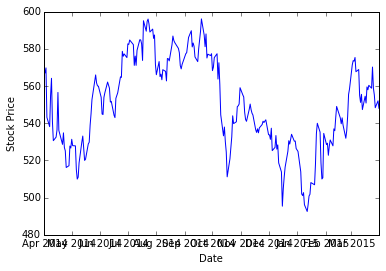

In [5]:
t = goog.index
plot(t,stkp)
xlabel("Date")
ylabel("Stock Price")

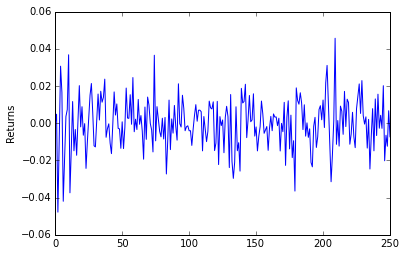

In [6]:
n = len(t)-1
rets = zeros(n)
for j in range(n):
    rets[j] = log(stkp[j+1]/stkp[j])
plot(rets)
ylabel("Returns")

(array([  1.,   1.,   1.,   1.,   2.,   2.,   6.,   7.,  14.,  17.,  21.,
         25.,  32.,  37.,  17.,  26.,  17.,   9.,   8.,   2.,   1.,   1.,
          2.,   0.,   1.]),
 array([-0.04781297, -0.04407384, -0.04033472, -0.03659559, -0.03285646,
        -0.02911734, -0.02537821, -0.02163909, -0.01789996, -0.01416083,
        -0.01042171, -0.00668258, -0.00294346,  0.00079567,  0.00453479,
         0.00827392,  0.01201305,  0.01575217,  0.0194913 ,  0.02323042,
         0.02696955,  0.03070868,  0.0344478 ,  0.03818693,  0.04192605,
         0.04566518]),
 <a list of 25 Patch objects>)

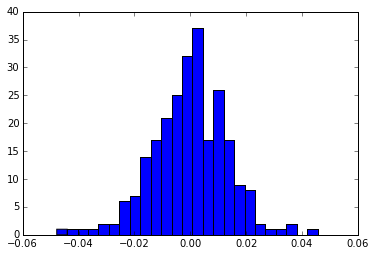

In [7]:
hist(rets,25)

In [8]:
goog.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,550.523850,554.668048,545.193662,550.081029,1922350.000000,550.081029
std,24.599106,24.145277,24.955973,24.524011,941218.139443,24.524011
min,494.649990,495.976010,487.560000,492.549990,7900.000000,492.549990
25%,531.007507,535.871978,526.500015,531.240007,1371625.000000,531.240007
50%,550.000000,553.994995,544.024995,549.170015,1691350.000000,549.170015
75%,571.622515,576.689985,566.231262,571.405017,2193975.000000,571.405017
max,599.989990,604.830020,592.500000,596.080020,6790900.000000,596.080020


In [9]:
import scipy.stats as ss
print("Skewness = ",ss.skew(rets))
print("Kurtosis = ",ss.kurtosis(rets))

#CHECK IF THIS IS EXCESS KURTOSIS or PLAIN KURTOSIS
x = randn(1000000)
print(ss.kurtosis(x))

('Skewness = ', -0.173028777259206)
('Kurtosis = ', 0.9993234508893414)
0.00302654770593


### SHARING VARIABLES FROM PYTHON TO R

In [10]:
#SENDING DATA VARIABLES TO R
%load_ext rpy2.ipython
#THIS ALLOWS US TO USE R INSIDE THE NOTEBOOK

In [11]:
#SENDS DATA FROM PYTHON TO R
%Rpush stkp       

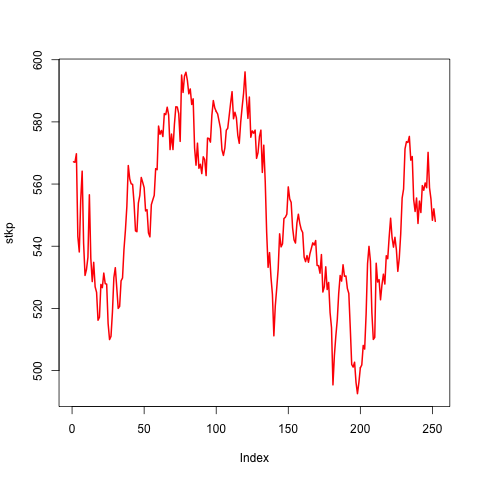

In [12]:
#PREFIX NEEDED TO CALL R INSTEAD OF PYTHON
%R plot(stkp,type="l",col="red",lwd=2)   

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-0.0478100 -0.0076790 -0.0001538 -0.0001369  0.0088830  0.0456700 


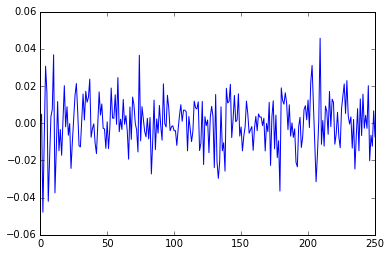

In [13]:
#GETTING DATA BACK FROM R TO PYTHON
%R ret = diff(log(stkp))
#GET DATA BACK FROM R TO PYTHON
ret = %Rget ret   
plot(ret)
%R print(summary(ret))

### GETTING STOCK DATA FROM R INTO PYTHON

In [14]:
%%R
library(quantmod)
getSymbols(c("C","AAPL","CSCO","YHOO","IBM"))

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.
    As of 0.4-0, ‘getSymbols’ uses env=parent.frame() and
 auto.assign=TRUE by default.

 This  behavior  will be  phased out in 0.5-0  when the call  will
 default to use auto.assign=FALSE. getOption("getSymbols.env") and 
 getOptions("getSymbols.auto.assign") are now checked for alternate defaults

 This message is shown once per session and may be disabled by setting 
 options("getSymbols.warning4.0"=FALSE). See ?getSymbol for more details
[1] "C"    "AAPL" "CSCO" "YHOO" "IBM" 


In [15]:
%%R 
citi = as.matrix(C$C.Adjusted)
aapl = as.matrix(AAPL$AAPL.Adjusted)
csco = as.matrix(CSCO$CSCO.Adjusted)
yhoo = as.matrix(YHOO$YHOO.Adjusted)
ibm = as.matrix(IBM$IBM.Adjusted)

In [16]:
%%R 
stkdata = data.frame(cbind(citi,aapl,csco,yhoo,ibm))
rn = rownames(stkdata)
head(stkdata)

           C.Adjusted AAPL.Adjusted CSCO.Adjusted YHOO.Adjusted IBM.Adjusted
2007-01-03   497.5920      11.29213      24.94332         25.61     83.41148
2007-01-04   495.8808      11.54276      25.59996         26.85     84.30331
2007-01-05   493.2690      11.46057      25.60896         27.74     83.54011
2007-01-08   495.7907      11.51716      25.75288         27.92     84.80925
2007-01-09   491.4678      12.47390      25.60896         27.58     85.81255
2007-01-10   487.5050      13.07084      25.79785         28.70     84.80067


In [17]:
stkdata = %Rget stkdata
rn = %Rget rn

In [18]:
stkdata

array([[ 497.59198,  495.8808 ,  493.26904, ...,   53.76   ,   53.32   ,
          53.76   ],
       [  11.29213,   11.54276,   11.46057, ...,  128.64   ,  125.15   ,
         128.95   ],
       [  24.94332,   25.59996,   25.60896, ...,   29.05   ,   28.83   ,
          29.13   ],
       [  25.61   ,   26.85   ,   27.74   , ...,   43.28   ,   42.57   ,
          42.51   ],
       [  83.41148,   84.30331,   83.54011, ...,  174.39999,  171.28999,
         173.67   ]])

In [19]:
rn

array(['2007-01-03', '2007-01-04', '2007-01-05', ..., '2015-04-29',
       '2015-04-30', '2015-05-01'], 
      dtype='|S10')

### PANDAS IS AWESOME

In [20]:
import pandas as pd
stk = pd.DataFrame(stkdata)
stk = stk.T
stk.head()

,0,1,2,3,4
0,497.59198,11.29213,24.94332,25.61,83.41148
1,495.88080,11.54276,25.59996,26.85,84.30331
2,493.26904,11.46057,25.60896,27.74,83.54011
3,495.79074,11.51716,25.75288,27.92,84.80925
4,491.46780,12.47390,25.60896,27.58,85.81255


In [21]:
stk.columns=["C","AAPL","CSCO","YHOO","IBM"]
stk.index = rn
stk.head()

,C,AAPL,CSCO,YHOO,IBM
2007-01-03,497.59198,11.29213,24.94332,25.61,83.41148
2007-01-04,495.88080,11.54276,25.59996,26.85,84.30331
2007-01-05,493.26904,11.46057,25.60896,27.74,83.54011
2007-01-08,495.79074,11.51716,25.75288,27.92,84.80925
2007-01-09,491.46780,12.47390,25.60896,27.58,85.81255


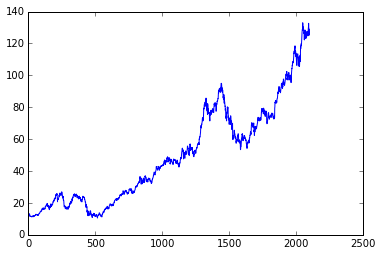

In [22]:
plot(stk["AAPL"])

In [23]:
stk.ix['2007-01-03']

C       497.59198
AAPL     11.29213
CSCO     24.94332
YHOO     25.61000
IBM      83.41148
Name: 2007-01-03, dtype: float64

In [24]:
stk.ix['2007-01-03']["AAPL"]

11.29213

In [25]:
stk["extra"] = 1.0
stk.head()

,C,AAPL,CSCO,YHOO,IBM,extra
2007-01-03,497.59198,11.29213,24.94332,25.61,83.41148,1
2007-01-04,495.88080,11.54276,25.59996,26.85,84.30331,1
2007-01-05,493.26904,11.46057,25.60896,27.74,83.54011,1
2007-01-08,495.79074,11.51716,25.75288,27.92,84.80925,1
2007-01-09,491.46780,12.47390,25.60896,27.58,85.81255,1


In [26]:
sort(stk["AAPL"])

array([  10.53752,   10.8461 ,   11.09404, ...,  132.17   ,  132.64999,
        133.     ])

In [27]:
stk.head()

,C,AAPL,CSCO,YHOO,IBM,extra
2007-01-03,497.59198,11.29213,24.94332,25.61,83.41148,1
2007-01-04,495.88080,11.54276,25.59996,26.85,84.30331,1
2007-01-05,493.26904,11.46057,25.60896,27.74,83.54011,1
2007-01-08,495.79074,11.51716,25.75288,27.92,84.80925,1
2007-01-09,491.46780,12.47390,25.60896,27.58,85.81255,1


In [28]:
stk = stk.drop("extra",axis=1)  #IF AXIS=0 (default), THEN ROW IS DROPPED
stk.head()

,C,AAPL,CSCO,YHOO,IBM
2007-01-03,497.59198,11.29213,24.94332,25.61,83.41148
2007-01-04,495.88080,11.54276,25.59996,26.85,84.30331
2007-01-05,493.26904,11.46057,25.60896,27.74,83.54011
2007-01-08,495.79074,11.51716,25.75288,27.92,84.80925
2007-01-09,491.46780,12.47390,25.60896,27.58,85.81255


In [29]:
stk[["AAPL","IBM"]].head()

,AAPL,IBM
2007-01-03,11.29213,83.41148
2007-01-04,11.54276,84.30331
2007-01-05,11.46057,83.54011
2007-01-08,11.51716,84.80925
2007-01-09,12.47390,85.81255


In [30]:
stk[stk["AAPL"]<11]

,C,AAPL,CSCO,YHOO,IBM
2008-11-20,46.80173,10.84610,13.01586,8.95,63.47624
2009-01-20,27.82269,10.53752,13.50160,11.01,72.53670


In [32]:
stk[stk["AAPL"]<11]["IBM"]

2008-11-20    63.48
2009-01-20    72.54
Name: IBM, dtype: float64

In [33]:
(stk < 50).head()

,C,AAPL,CSCO,YHOO,IBM
2007-01-03,False,True,True,True,False
2007-01-04,False,True,True,True,False
2007-01-05,False,True,True,True,False
2007-01-08,False,True,True,True,False
2007-01-09,False,True,True,True,False


In [34]:
sum(stk)

C       221567.15
AAPL    102168.36
CSCO     42781.91
YHOO     47775.87
IBM     291151.26
dtype: float64

In [35]:
#USING FUNCTIONS ON DATA FRAMES
f = lambda x: x.max() - x.min()
stk.apply(f)

C       496.94
AAPL    122.46
CSCO     18.41
YHOO     43.42
IBM     142.62
dtype: float64

In [36]:
def g(x):
    return pd.Series([x.mean(),x.std(),x.min(),x.max()], index=['mean','stdev','min','max'])
stk.apply(g)

,C,AAPL,CSCO,YHOO,IBM
mean,106.522668,49.119404,20.568226,22.969168,139.976567
stdev,135.337468,30.355509,3.962029,9.759319,40.315380
min,10.160000,10.540000,12.250000,8.950000,63.480000
max,507.100000,133.000000,30.660000,52.370000,206.100000


In [37]:
stk.sort_index(axis=1,ascending=False).head()

,YHOO,IBM,CSCO,C,AAPL
2007-01-03,25.61,83.41,24.94,497.59,11.29
2007-01-04,26.85,84.30,25.60,495.88,11.54
2007-01-05,27.74,83.54,25.61,493.27,11.46
2007-01-08,27.92,84.81,25.75,495.79,11.52
2007-01-09,27.58,85.81,25.61,491.47,12.47


In [38]:
stk.sum()

C       221567.15
AAPL    102168.36
CSCO     42781.91
YHOO     47775.87
IBM     291151.26
dtype: float64

In [39]:
stk.mean()

C       106.522668
AAPL     49.119404
CSCO     20.568226
YHOO     22.969168
IBM     139.976567
dtype: float64

In [40]:
stk.describe()

,C,AAPL,CSCO,YHOO,IBM
count,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000
mean,106.522668,49.119404,20.568226,22.969168,139.976567
std,135.337468,30.355509,3.962029,9.759319,40.315380
min,10.160000,10.540000,12.250000,8.950000,63.480000
25%,37.145000,22.397500,17.407500,15.450000,102.350000
50%,47.025000,45.075000,20.800000,18.250000,148.295000
75%,54.675000,73.145000,23.500000,28.435000,180.472500
max,507.100000,133.000000,30.660000,52.370000,206.100000


In [41]:
stk.diff().head()

,C,AAPL,CSCO,YHOO,IBM
2007-01-03,NaN,NaN,NaN,NaN,NaN
2007-01-04,-1.71,0.25,0.66,1.24,0.89
2007-01-05,-2.61,-0.08,0.01,0.89,-0.76
2007-01-08,2.52,0.06,0.14,0.18,1.27
2007-01-09,-4.32,0.95,-0.14,-0.34,1.00


In [42]:
stk.pct_change().head()

,C,AAPL,CSCO,YHOO,IBM
2007-01-03,NaN,NaN,NaN,NaN,NaN
2007-01-04,-0.003437,0.022143,0.026464,0.048419,0.010670
2007-01-05,-0.005263,-0.006932,0.000391,0.033147,-0.009015
2007-01-08,0.005109,0.005236,0.005467,0.006489,0.015202
2007-01-09,-0.008713,0.082465,-0.005437,-0.012178,0.011791


In [43]:
stk.pct_change().mean()*252.0

C      -0.052665
AAPL    0.351436
CSCO    0.062700
YHOO    0.152730
IBM     0.106559
dtype: float64

In [44]:
stk.pct_change().std()*sqrt(252.0)

C       0.669590
AAPL    0.343694
CSCO    0.317718
YHOO    0.416351
IBM     0.228973
dtype: float64

In [45]:
rets = stk.pct_change()
rets.corr()

,C,AAPL,CSCO,YHOO,IBM
C,1.000000,0.378732,0.465752,0.330307,0.442698
AAPL,0.378732,1.000000,0.487141,0.342638,0.485708
CSCO,0.465752,0.487141,1.000000,0.406206,0.582500
YHOO,0.330307,0.342638,0.406206,1.000000,0.377730
IBM,0.442698,0.485708,0.582500,0.377730,1.000000


In [46]:
rets.cov()

,C,AAPL,CSCO,YHOO,IBM
C,0.001779,0.000346,0.000393,0.000365,0.000269
AAPL,0.000346,0.000469,0.000211,0.000195,0.000152
CSCO,0.000393,0.000211,0.000401,0.000213,0.000168
YHOO,0.000365,0.000195,0.000213,0.000688,0.000143
IBM,0.000269,0.000152,0.000168,0.000143,0.000208


In [47]:
sqrt(diag(rets.cov())*252.0)

array([ 0.66958975,  0.3436938 ,  0.31771753,  0.41635095,  0.22897315])

In [48]:
rets.corrwith(rets.AAPL)

C       0.378732
AAPL    1.000000
CSCO    0.487141
YHOO    0.342638
IBM     0.485708
dtype: float64

### STACKING UP DATA IN PANELS

In [49]:
import pandas.io.data as pid
panel = pd.Panel(dict((stock, pid.get_data_yahoo(stock,'1/1/2014','2/28/2015')) for stock in ['C','AAPL','CSCO','YHOO','IBM']))
panel

<class 'pandas.core.panel.Panel'>
Dimensions: 5 (items) x 291 (major_axis) x 6 (minor_axis)
Items axis: AAPL to YHOO
Major_axis axis: 2014-01-02 00:00:00 to 2015-02-27 00:00:00
Minor_axis axis: Open to Adj Close

In [50]:
panel = panel.swapaxes('items','minor')
panel

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 291 (major_axis) x 5 (minor_axis)
Items axis: Open to Adj Close
Major_axis axis: 2014-01-02 00:00:00 to 2015-02-27 00:00:00
Minor_axis axis: AAPL to YHOO

In [51]:
panel['Adj Close'].head()

,AAPL,C,CSCO,IBM,YHOO
Date,,,,,
2014-01-02,77.09,52.22,21.18,179.87,39.59
2014-01-03,75.39,53.35,21.16,180.95,40.12
2014-01-06,75.80,53.76,21.19,180.33,39.93
2014-01-07,75.26,54.12,21.47,183.92,40.92
2014-01-08,75.74,54.75,21.45,182.24,41.02


In [52]:
panel.ix[:,'1/3/2014',:]

,Open,High,Low,Close,Volume,Adj Close
AAPL,552.86,553.70,540.43,540.98,98116900,75.39
C,52.39,53.47,52.31,53.40,26884900,53.35
CSCO,22.09,22.12,21.83,21.98,36328200,21.16
IBM,185.83,187.35,185.30,186.64,4063200,180.95
YHOO,40.16,40.44,39.82,40.12,15755200,40.12


### READING DATA FROM FILES

In [53]:
import pandas as pd
data = pd.read_table("markowitzdata.txt")

In [54]:
data.head()

,DATE,SUNW,MSFT,IBM,CSCO,AMZN,mktrf,smb,hml,rf
0,20010102,-0.087444,0.000000,-0.002206,-0.129085,-0.108434,-0.0345,-0.0037,0.0209,0.00026
1,20010103,0.297297,0.105187,0.115696,0.240150,0.265766,0.0527,0.0097,-0.0493,0.00026
2,20010104,-0.060606,0.010430,-0.015192,0.013616,-0.117438,-0.0121,0.0083,-0.0015,0.00026
3,20010105,-0.096774,0.014194,0.008719,-0.125373,-0.060484,-0.0291,0.0027,0.0242,0.00026
4,20010108,0.006696,-0.003817,-0.004654,-0.002133,0.025751,-0.0037,-0.0053,0.0129,0.00026


In [55]:
gdata = pd.read_csv("goog.csv")

In [56]:
gdata.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2011-04-06,572.18,575.16,568.00,574.18,2668300,574.18
1,2011-04-05,581.08,581.49,565.68,569.09,6047500,569.09
2,2011-04-04,593.00,594.74,583.10,587.68,2054500,587.68
3,2011-04-01,588.76,595.19,588.76,591.80,2613200,591.80
4,2011-03-31,583.00,588.16,581.74,586.76,2029400,586.76


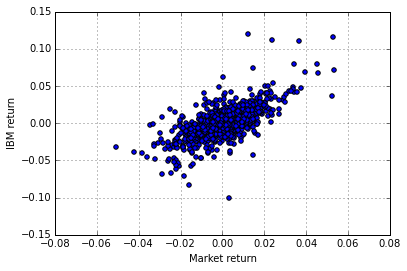

In [57]:
scatter(data["mktrf"],data["IBM"])
xlabel("Market return")
ylabel("IBM return")
grid(True)

In [58]:
from scipy import stats
y = data["IBM"]
x = data["mktrf"]
b, a, r_value, p_value, std_err = stats.linregress(x,y)
print "Intercept = ",a
print "slope (beta) = ",b

Intercept =  0.00011890050765
slope (beta) =  1.10915240511


### BRINGING IT ALL TOGETHER

In [59]:
import pandas as pd
import pandas.io.data as web
aapl = web.DataReader('AAPL',data_source='google',start='1/1/2104',end='4/1/2015')
aapl.head()

,Open,High,Low,Close,Volume
﻿Date,,,,,
2014-04-02,77.48,77.64,77.18,77.51,45104871
2014-04-03,77.34,77.50,76.81,76.97,40648111
2014-04-04,77.12,77.14,75.80,75.97,68812485
2014-04-07,75.43,75.84,74.56,74.78,72462530
2014-04-08,75.03,75.16,74.10,74.78,60971883


In [60]:
aapl.tail()

,Open,High,Low,Close,Volume
﻿Date,,,,,
2015-03-26,122.76,124.88,122.60,124.24,47572869
2015-03-27,124.57,124.70,122.91,123.25,39546151
2015-03-30,124.05,126.40,124.00,126.37,47099670
2015-03-31,126.09,126.49,124.36,124.43,42090553
2015-04-01,124.82,125.12,123.10,124.25,40621437


In [61]:
aapl['cont_ret'] = log(aapl['Close']/aapl['Close'].shift(1))
aapl.head()

,Open,High,Low,Close,Volume,cont_ret
﻿Date,,,,,,
2014-04-02,77.48,77.64,77.18,77.51,45104871,NaN
2014-04-03,77.34,77.50,76.81,76.97,40648111,-0.006991
2014-04-04,77.12,77.14,75.80,75.97,68812485,-0.013077
2014-04-07,75.43,75.84,74.56,74.78,72462530,-0.015788
2014-04-08,75.03,75.16,74.10,74.78,60971883,0.000000


In [62]:
aapl['Vols'] = pd.rolling_std(aapl['cont_ret'],window=5)*sqrt(252.0)
aapl.tail()

,Open,High,Low,Close,Volume,cont_ret,Vols
﻿Date,,,,,,,
2015-03-26,122.76,124.88,122.60,124.24,47572869,0.006946,0.237901
2015-03-27,124.57,124.70,122.91,123.25,39546151,-0.008000,0.230939
2015-03-30,124.05,126.40,124.00,126.37,47099670,0.024999,0.301835
2015-03-31,126.09,126.49,124.36,124.43,42090553,-0.015471,0.318742
2015-04-01,124.82,125.12,123.10,124.25,40621437,-0.001448,0.247050


In [63]:
aapl.head(10)

,Open,High,Low,Close,Volume,cont_ret,Vols
﻿Date,,,,,,,
2014-04-02,77.48,77.64,77.18,77.51,45104871,NaN,NaN
2014-04-03,77.34,77.50,76.81,76.97,40648111,-0.006991,NaN
2014-04-04,77.12,77.14,75.80,75.97,68812485,-0.013077,NaN
2014-04-07,75.43,75.84,74.56,74.78,72462530,-0.015788,NaN
2014-04-08,75.03,75.16,74.10,74.78,60971883,0.000000,NaN
2014-04-09,74.66,75.78,74.57,75.76,51542722,0.013020,0.183481
2014-04-10,75.81,76.03,74.74,74.78,59912818,-0.013020,0.193232
2014-04-11,74.14,74.69,73.88,74.23,67975012,-0.007382,0.183662
2014-04-14,74.56,74.59,73.89,74.53,51445177,0.004033,0.160238


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10f24ab10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10fd24a50>], dtype=object)

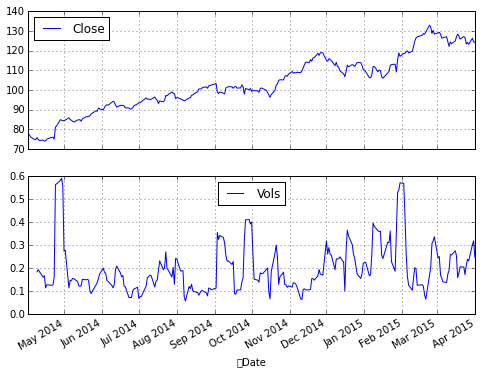

In [64]:
aapl[['Close','Vols']].plot(subplots=True,color='blue',figsize=(8,6))

### DIVERSIFICATION

DIVERSIFICATION OF A PORTFOLIO

It is useful to examine the power of using vector algebra with an application. Here we use vector and summation math to understand how diversification in stock portfolios works. Diversification occurs when we increase the number of non-perfectly correlated stocks in a portfolio, thereby reducing portfolio variance. In order to compute the variance of the portfolio we need to use the portfolio weights ${\bf w}$ and the covariance matrix of stock returns ${\bf R}$, denoted ${\bf \Sigma}$. We first write down the formula for a portfolio's return variance: 

\begin{equation}
Var(\boldsymbol{w'R}) = \boldsymbol{w'\Sigma w} = \sum_{i=1}^n \boldsymbol{w_i^2 \sigma_i^2}
+ \sum_{i=1}^n \sum_{j=1,i \neq j}^n \boldsymbol{w_i w_j \sigma_{ij}}
\end{equation}

Readers are strongly encouraged to implement this by hand for $n=2$ to convince themselves that the vector form of the expression for variance $\boldsymbol{w'\Sigma w}$ is the same thing as the long form on the right-hand side of the equation above. 
If returns are independent, then the formula collapses to: 

\begin{equation}
Var(\bf{w'R}) = \bf{w'\Sigma w} = \sum_{i=1}^n \boldsymbol{w_i^2 \sigma_i^2}
\end{equation}

If returns are dependent, and equal amounts are invested in
each asset ($w_i=1/n,\;\;\forall i$):

\begin{eqnarray*}
Var(\bf{w'R}) &=&  \frac{1}{n}\sum_{i=1}^n \frac{\sigma_i^2}{n}
+ \frac{n-1}{n}\sum_{i=1}^n \sum_{j=1,i \neq j}^n  \frac{\sigma_{ij}}{n(n-1)}\\
&=& \frac{1}{n} \bar{\sigma_i}^2 + \frac{n-1}{n} \bar{\sigma_{ij}}\\
&=& \frac{1}{n} \bar{\sigma_i}^2 + \left(1 - \frac{1}{n} \right) \bar{\sigma_{ij}}
\end{eqnarray*}

The first term is the average variance, denoted $\bar{\sigma_1}^2$ divided by $n$, and the second is the average covariance, denoted $\bar{\sigma_{ij}}$ multiplied by factor $(n-1)/n$. As $n \rightarrow \infty$,

\begin{equation}
Var({\bf w'R}) = \bar{\sigma_{ij}}
\end{equation}

This produces the remarkable result that in a well diversified portfolio, the variances of each stock's return does not matter at all for portfolio risk! Further the risk of the portfolio, i.e., its variance, is nothing but the average of off-diagonal terms in the covariance matrix. 

In [ ]:
sd=0.20; cv=0.01; m=100
n = range(1,m+1) 
sd_p = zeros(m)
for j in n:
    cv_mat = matrix(ones((j,j))*cv)
    fill_diagonal(cv_mat,sd**2)
    w = matrix(ones(j)*(1.0/j)).T
    sd_p[j-1] = sqrt((w.T).dot(cv_mat).dot(w))

In [ ]:
plot(n,sd_p)
xlabel('#stocks')
ylabel('stddev of portfolio')
grid()

### Arithmetic vs Geometric mean returns

The geometric mean is a good indicator of past performance, especially when we are interested in holding period returns. But if we are interested in expected future returns, the arithmetic mean is the relevant statistic.

Suppose a stock will rise by 30% or fall by 20% with equal probability. If it did one each in consecutive years then the geometric mean return is:

In [ ]:
g_ret = ((1+0.30)*(1-0.20))**0.5-1
print "Geometric mean return = ", g_ret

In [ ]:
a_ret = 0.5*(0.30+(-0.20))
print "Arithmetic mean return per year = ",a_ret

Which one is more realistic in predicting future expected returns over the next two years? Note that there are 4 cases to consider for outcomes, all with equal probability $1/4$. 

In [ ]:
ret = zeros(4)
ret[0] = (1+0.3)*(1+0.3)
ret[1] = (1+0.3)*(1-0.2)
ret[2] = (1-0.2)*(1+0.3)
ret[3] = (1-0.2)*(1-0.2)
two_year_return = 0.25*sum(ret)
print "Expected two year return = ", two_year_return
print "Expected two year return (annualized) = ", two_year_return**0.5